# MVP: Analysis of IMDB Movie Reviews Project
### Student Name: Samahir Bantan

### The goal is to implement a model based on machine learning algorithm to classify the reviews based on the writer's way of highlighting his feelings and choosing the words that made the comment positive or negative.

### For starter, I explored the data and do some preprocessing techniques for texts. Then, I analysed the data before building the model for better understanding. This file explain the process.

### -------------------------------------------------------------------------

#### (*) Import the necessary library to read the dataset and show 5 first rows

In [1]:
import pandas as pd
IMDB_data = pd.read_csv("IMDB Dataset.csv")
IMDB_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### (*) Lets do some preprocessing for the dataset
1. Find duplicate rows -if it exists-

In [2]:
isDuplicated = IMDB_data.duplicated(subset=None, keep='first')
isDuplicated

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [3]:
#because the dataset is huge, I coded for printing only the duplicate once
dupl_rows = []
for i in range(len(isDuplicated)):
    if(isDuplicated[i]==True):
        dupl_rows.append(i)
        print('index is: ',i, 'is duplicated? ',isDuplicated[i])

index is:  3537 is duplicated?  True
index is:  3769 is duplicated?  True
index is:  4391 is duplicated?  True
index is:  6352 is duplicated?  True
index is:  6479 is duplicated?  True
index is:  6672 is duplicated?  True
index is:  7221 is duplicated?  True
index is:  7222 is duplicated?  True
index is:  7425 is duplicated?  True
index is:  7555 is duplicated?  True
index is:  8040 is duplicated?  True
index is:  8801 is duplicated?  True
index is:  8868 is duplicated?  True
index is:  8874 is duplicated?  True
index is:  9057 is duplicated?  True
index is:  9503 is duplicated?  True
index is:  9522 is duplicated?  True
index is:  10054 is duplicated?  True
index is:  10424 is duplicated?  True
index is:  10868 is duplicated?  True
index is:  11489 is duplicated?  True
index is:  11682 is duplicated?  True
index is:  11992 is duplicated?  True
index is:  12531 is duplicated?  True
index is:  12608 is duplicated?  True
index is:  12819 is duplicated?  True
index is:  12846 is duplicate

index is:  47467 is duplicated?  True
index is:  47527 is duplicated?  True
index is:  47642 is duplicated?  True
index is:  47673 is duplicated?  True
index is:  47705 is duplicated?  True
index is:  47733 is duplicated?  True
index is:  47765 is duplicated?  True
index is:  47790 is duplicated?  True
index is:  47864 is duplicated?  True
index is:  47876 is duplicated?  True
index is:  47890 is duplicated?  True
index is:  47979 is duplicated?  True
index is:  48010 is duplicated?  True
index is:  48045 is duplicated?  True
index is:  48058 is duplicated?  True
index is:  48060 is duplicated?  True
index is:  48156 is duplicated?  True
index is:  48304 is duplicated?  True
index is:  48355 is duplicated?  True
index is:  48383 is duplicated?  True
index is:  48444 is duplicated?  True
index is:  48581 is duplicated?  True
index is:  48583 is duplicated?  True
index is:  48607 is duplicated?  True
index is:  48624 is duplicated?  True
index is:  48775 is duplicated?  True
index is:  4

In [4]:
#There is actually a duplicate rows. So, remove them
cleaned_data = IMDB_data.drop(dupl_rows, axis=0)
len(cleaned_data)

49582

#### (*) Continue do some preprocessing for the dataset
2. Check if there is missing data

In [5]:
cleaned_data.info()
#Result show there is no missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


#### (*) Continue do some preprocessing for the dataset
3. Check if the data is balanced

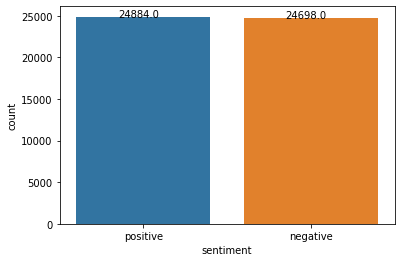

In [6]:
import seaborn as sns
ax = sns.countplot(cleaned_data['sentiment']);
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [7]:
new = cleaned_data['sentiment'].value_counts()
new

positive    24884
negative    24698
Name: sentiment, dtype: int64

The dataset is imbalanced -positive reviews > negative reviews-

Since the differance between +ve and -ve is 186, I would use under sampling method to solve this problem

In [8]:
X = cleaned_data['review'].values.reshape(-1, 1)
y = cleaned_data['sentiment']

In [9]:
#Do undersampling method to balance the data
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_sampled, y_sampled = undersample.fit_resample(X, y)
y_sampled.value_counts()

#notice; if we added 24698+24698+(difference 186) the total would be the orignal data after delete the duplicated rows

positive    24698
negative    24698
Name: sentiment, dtype: int64

#### (*) Do NLTK
1. Remove speical charachers

In [10]:
#convert x_sampled into pandas series instead of numpy 2D-array
X_sampled = pd.Series(X_sampled.flatten())
X_sampled

0        Basically there's a family where a little boy ...
1        This show was an amazing, fresh & innovative i...
2        Encouraged by the positive comments about this...
3        Phil the Alien is one of those quirky films wh...
4        I saw this movie when I was about 12 when it c...
                               ...                        
49391    Early in the movie, Cagney's Johnny Cave chara...
49392    The sequel is exactly what you will expect it ...
49393    MCBOING BOING is one of the cartoons that have...
49394    Being the Beatlemaniac that I am, I approached...
49395    This is a decent effort for a B-Movie Martial ...
Length: 49396, dtype: object

In [11]:
#remove special character code
X_sampled = X_sampled.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
X_sampled

0        Basically theres a family where a little boy J...
1        This show was an amazing fresh  innovative ide...
2        Encouraged by the positive comments about this...
3        Phil the Alien is one of those quirky films wh...
4        I saw this movie when I was about 12 when it c...
                               ...                        
49391    Early in the movie Cagneys Johnny Cave charact...
49392    The sequel is exactly what you will expect it ...
49393    MCBOING BOING is one of the cartoons that have...
49394    Being the Beatlemaniac that I am I approached ...
49395    This is a decent effort for a BMovie Martial A...
Length: 49396, dtype: object

#### (*) Continue doing NLTK
2. Convert all reviews into lowercase

In [12]:
X_sampled = X_sampled.str.lower()
X_sampled

0        basically theres a family where a little boy j...
1        this show was an amazing fresh  innovative ide...
2        encouraged by the positive comments about this...
3        phil the alien is one of those quirky films wh...
4        i saw this movie when i was about 12 when it c...
                               ...                        
49391    early in the movie cagneys johnny cave charact...
49392    the sequel is exactly what you will expect it ...
49393    mcboing boing is one of the cartoons that have...
49394    being the beatlemaniac that i am i approached ...
49395    this is a decent effort for a bmovie martial a...
Length: 49396, dtype: object

#### (*) Continue doing NLTK
3. Remove stop words

In [13]:
#make a copy of X_sampled
X_withoutStopWords = X_sampled.copy()
X_withoutStopWords.head()

0    basically theres a family where a little boy j...
1    this show was an amazing fresh  innovative ide...
2    encouraged by the positive comments about this...
3    phil the alien is one of those quirky films wh...
4    i saw this movie when i was about 12 when it c...
dtype: object

In [14]:
#check number of the words in the first review before removing stop words
len(X_withoutStopWords.loc[0])

706

In [15]:
#remove stop word
import nltk
from nltk.corpus import stopwords

for index, value in X_withoutStopWords.items():
    words = nltk.word_tokenize(value)
    X_withoutStopWords.loc[index] = [word for word in words if word not in stopwords.words('english')]

In [16]:
#check number of the words in the first review after removing stop words
len(X_withoutStopWords.loc[0])

72

#### (*) Analysis of the dataset
Count frequency of words of each diffrenet lable

In [17]:
#map dataset
a = {"review": X_withoutStopWords,"sentiment": y_sampled}
cleaned_dataset = pd.DataFrame(a)
cleaned_dataset.head()

,review,sentiment
0,"[basically, theres, family, little, boy, jake,...",negative
1,"[show, amazing, fresh, innovative, idea, 70s, ...",negative
2,"[encouraged, positive, comments, film, looking...",negative
3,"[phil, alien, one, quirky, films, humour, base...",negative
4,"[saw, movie, 12, came, recall, scariest, scene...",negative


In [18]:
#store +ve and -ve reviews in a different variables
positve_rev = cleaned_dataset.loc[cleaned_dataset['sentiment'] == 'positive']
positve_rev

,review,sentiment
24698,"[first, aired, masterpiece, theatre, profound,...",positive
24699,"[bunch, american, students, tutor, decide, vis...",positive
24700,"[refreshing, breath, air, movie, actually, giv...",positive
24701,"[opening, night, released, 1977, tries, ambiti...",positive
24702,"[love, movie, mean, story, may, best, dancing,...",positive
...,...,...
49391,"[early, movie, cagneys, johnny, cave, characte...",positive
49392,"[sequel, exactly, expect, good, enough, everyo...",positive
49393,"[mcboing, boing, one, cartoons, stuck, head, y...",positive
49394,"[beatlemaniac, approached, two, us, combinatio...",positive


In [19]:
negative_rev = cleaned_dataset.loc[cleaned_dataset['sentiment'] == 'negative']
negative_rev

,review,sentiment
0,"[basically, theres, family, little, boy, jake,...",negative
1,"[show, amazing, fresh, innovative, idea, 70s, ...",negative
2,"[encouraged, positive, comments, film, looking...",negative
3,"[phil, alien, one, quirky, films, humour, base...",negative
4,"[saw, movie, 12, came, recall, scariest, scene...",negative
...,...,...
24693,"[typical, junk, comedybr, br, almost, laughs, ...",negative
24694,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
24695,"[catholic, taught, parochial, elementary, scho...",negative
24696,"[im, going, disagree, previous, comment, side,...",negative


In [20]:
#now count frequency of words, iterate each row in the both variables
import itertools
positive_reviews_words = list(itertools.chain(*positve_rev['review']))
print("Total words in positive reviews:", len(positive_reviews_words))

negative_reviews_words = list(itertools.chain(*negative_rev['review']))
print("Total words in negative reviews:", len(negative_reviews_words))

Total words in positive reviews: 3066073
Total words in negative reviews: 3003043


In [21]:
#count the appearance of each word
import collections
positive_words_frequency = collections.Counter(positive_reviews_words)
#get the top 15 most frequent words in positive reviews
positive_words_freq_df = pd.DataFrame(positive_words_frequency.most_common(15), columns=["Word", "Frequency"])

negative_words_frequency = collections.Counter(negative_reviews_words)
#get the top 15 most frequent words in negative reviews
negative_words_freq_df = pd.DataFrame(negative_words_frequency.most_common(15), columns=["Word", "Frequency"])

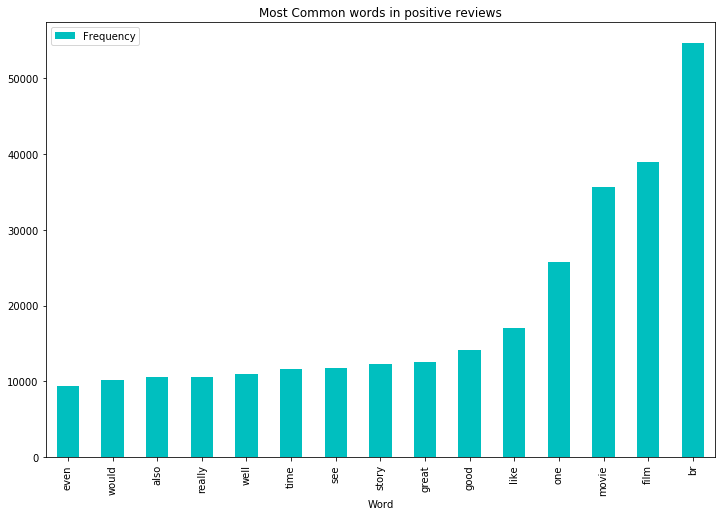

In [22]:
#visualize the results
import matplotlib.pyplot as plt
# set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# plot horizontal bar plot
positive_words_freq_df.sort_values(by='Frequency').plot.bar(x="Word", y="Frequency", ax=ax, color='c')
# set the title
plt.title("Most Common words in positive reviews")
plt.show()

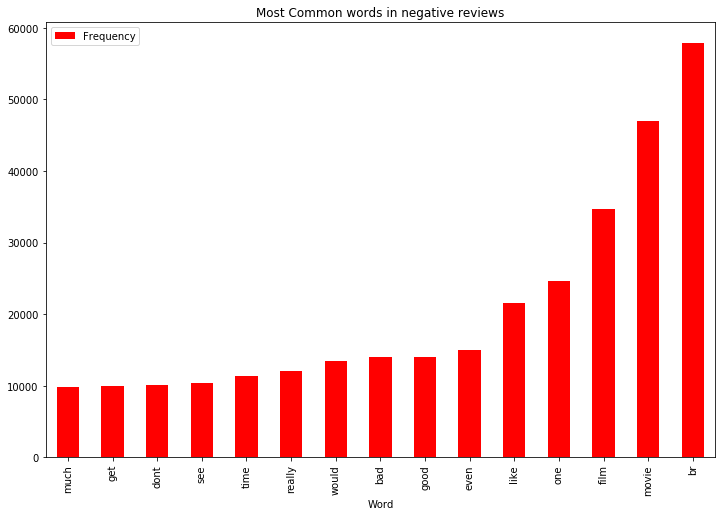

In [23]:
#visualize 
import matplotlib.pyplot as plt
# set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# plot horizontal bar plot
negative_words_freq_df.sort_values(by='Frequency').plot.bar(x="Word", y="Frequency", ax=ax, color='r')
# set the title
plt.title("Most Common words in negative reviews")
plt.show()

positive_words_freq_df.loc['bad']

In [24]:
#count the matching words that appearce in both variabels
count=0
for i in range(len(positive_words_freq_df)):
    for j in range(len(negative_words_freq_df)):
        if positive_words_freq_df['Word'][i] == negative_words_freq_df['Word'][j]:
            count+=1

In [25]:
count

11

The top 15 most frequently word in each sentimint category shows that; 11 out of them were appeard in both sentimints. As a result, its hard to define or make a good decission whether its +ve or -ve review by a specific word exist in the text. For example, the word 'good' appeared in both and its one of the most frequently word and clearly its conffusing this will lead to faulse decission.